In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load the dataset
data = np.loadtxt('dataset.txt', delimiter = ',')

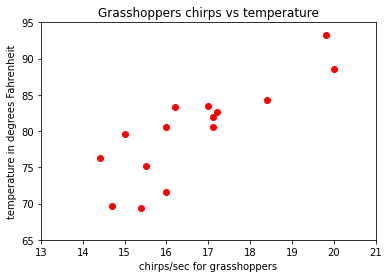

In [3]:
#Plot the data
plt.scatter(data[:,0],data[:,1],color = 'red' )
plt.title('Grasshoppers chirps vs temperature')
plt.xlabel('chirps/sec for grasshoppers')
plt.ylabel('temperature in degrees Fahrenheit')
plt.xlim([13,21])
plt.ylim([65,95])
plt.show()

In [5]:
h = lambda theta_0,theta_1,x: theta_0 + theta_1*x

def J(x,y,m,theta_0,theta_1):
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0,theta_1,x[i])-y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

def grad_J(x,y,m,theta_0,theta_1):
    returnValue = np.array([0.,0.])
    for i in range(m):
        returnValue[0] += (h(theta_0,theta_1,x[i])-y[i])
        returnValue[1] += (h(theta_0,theta_1,x[i])-y[i])*x[i]
    returnValue = returnValue/(m)
    return returnValue

In [6]:
##Now, we'll load our data into the x and y variables;

x = data[:, 0]
y = data[:, 1]
m = len(x)

In [7]:
#Now we'll run our gradient descent algorithm (without adaptive step sizes in this example):
theta_old = np.array([0.,0.])
theta_new = np.array([1.,1.]) # The algorithm starts at [1,1]
n_k = 0.001 # step size
precision = 0.001
num_steps = 0
s_k = float("inf")

while np.linalg.norm(s_k) > precision:
    num_steps += 1
    theta_old = theta_new
    s_k = -grad_J(x,y,m,theta_old[0],theta_old[1])
    theta_new = theta_old + n_k * s_k

print("Local minimum occurs where:")
print("theta_0 =", theta_new[0])
print("theta_1 =", theta_new[1])
print("This took",num_steps,"steps to converge")

Local minimum occurs where:
theta_0 = 25.128552558595363
theta_1 = 3.297264756251897
This took 565859 steps to converge


In [8]:
###For comparison, let's get the actual values for $\theta_0$ and $\theta_1$:


actualvalues = sp.stats.linregress(x,y)
print("Actual values for theta are:")
print("theta_0 =", actualvalues.intercept)
print("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 25.23230498342602
theta_1 = 3.291094567947565


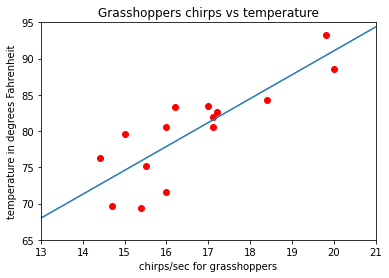

In [9]:
#plotting the graph

xx = np.linspace(0,21,1000)
plt.scatter(data[:, 0], data[:, 1], color="red")
plt.plot(xx,h(theta_new[0],theta_new[1],xx))
plt.xlim([13,21])
plt.ylim([65,95])
plt.title('Grasshoppers chirps vs temperature')
plt.xlabel('chirps/sec for grasshoppers')
plt.ylabel('temperature in degrees Fahrenheit')
plt.show()